# InsightMaker Breeding Simulation

### 1. Introduction

Insight maker is an interactive web page that allows the user to build simulation models and express the process and results through pictures. It is useful to visually illustrate complex simulation models.

There are two builds of the simulation. The first is an example simulation, built manually and uses presets as input. The second is a generator that can build a model with a customizable amount of generations and number of unique alleles.

### 2. Example Simulation

#### a. Appearance

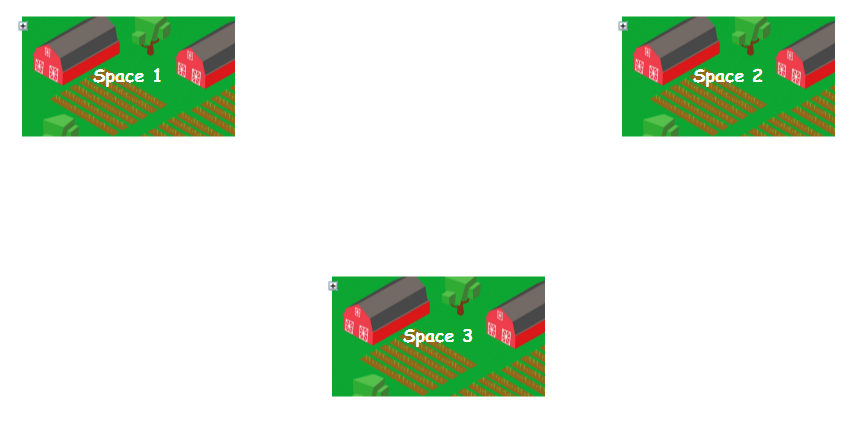

This is the simplest apprearence of the example simulation. There are 3 spaces representing 3 different locations. Each location will have a population that is given certain characteristics, and as they advance through 5 total generations we can observe the average yield and the proportion of each genotype that survives.

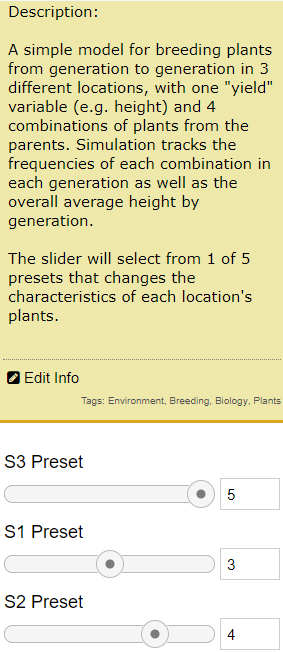

Located on the right side of the page is a brief description of what the simulation does. The sliders below the description are used to assign presets to each location's plants. The presets affect each genotypes average yield, the proportion of each allele in the parents, and the cutoff percentage when selecting for the next generation. These numbers are not fully customizable in the example, there are 5 different presets to choose from to observe the differences from preset to preset.

#### b. Running the simulation

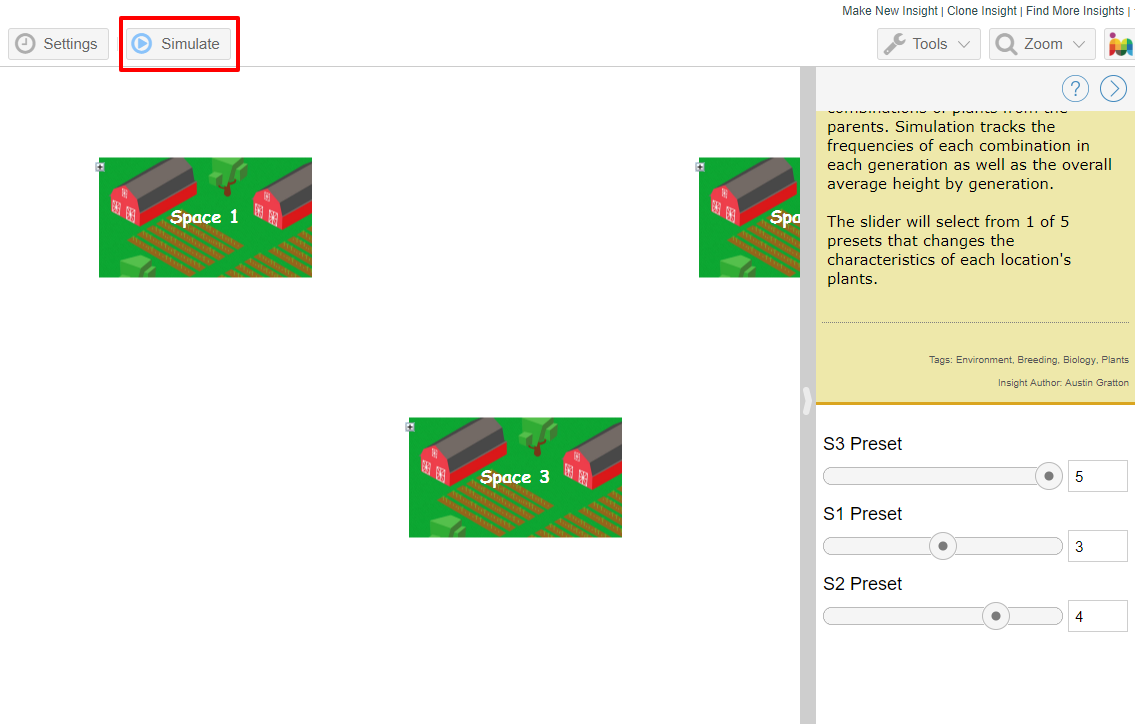

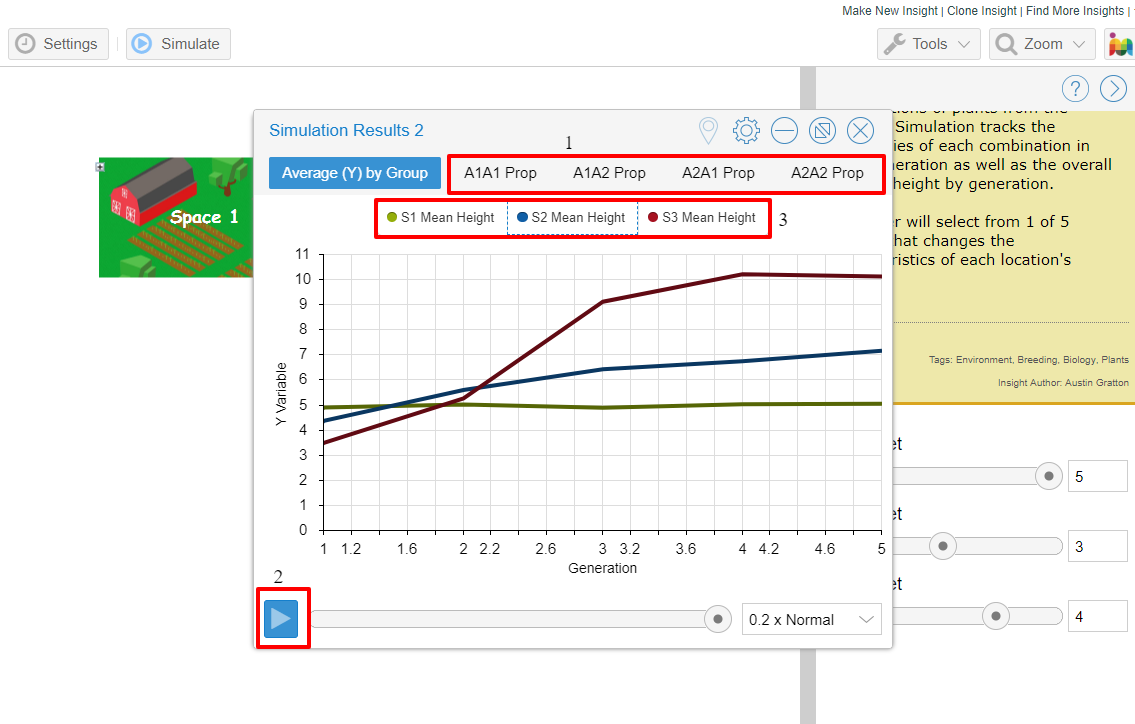

In the upper left hand corner of the screen locate the simualte button. After adjusting to the desired presets, click the simulate button. An animated graph will pop up, initially showing the progression of the Y variable (yield) over all 5 generations in all 3 spaces. There are 4 additional tabs (1) to observe the proportion of each genotype over all 5 generations in all 3 spaces. To repeat the animation, the blue play button (2) in the lower left hand corner can be pressed. To remove the results of one space, simply click on the space you would like to remove in the legend of the graph (3) and the line will be removed.

#### c. Process behind simulation

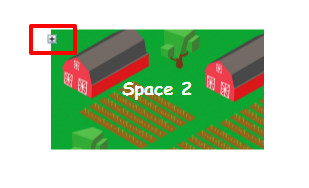

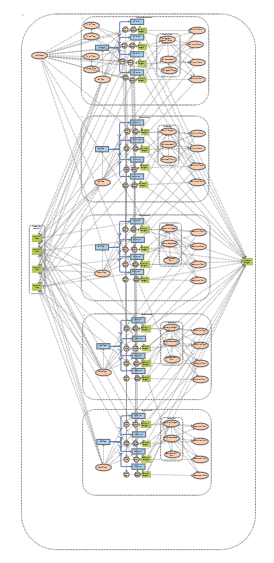

Clicking the plus sign in the other left corner of a space's image, we can see the inner workings of the simulation. Note that each Insight variable that uses another Insight variable for input requires a "link" (the dotted line), causing the expanded space to have a very messy appearance. This is why we collapse each space into a single image. 
